<a href="https://colab.research.google.com/github/birdx0810/LearningTensorFlow/blob/main/TensorFlow_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow 101
This is an introduction for using TensorFlow in Deep Learning. We will be using TF2.0 (w/o Keras) throughout this notebook, and subjects we'll be talking about include:
- Basic Tensor Operations
- Basic Perceptron Layer
- Basic Dataset Creation

## Import Requirements

In [1]:
# %tensorflow_version 2.x
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Tensors and Operations

Tensor is a type of multidimensional array with certain transformation properties. The former is a function where the latter is a data structure. In computer science, we think of Tensors as a generalization of vectors and matrixes to higher dimensions.

```
Tensor : N-d Array :: Linear Transformation : Matrix
```

TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors.

Reference:  
- [Tensors vs. N-d Arrays]https://math.stackexchange.com/questions/1134809/are-there-any-differences-between-tensors-and-multidimensional-arrays

In [2]:
# Create a 3-d Tensor
matrix = tf.constant(np.arange(27).reshape((3,3,3)), tf.float64)

print(f"`matrix` is a {tf.rank(matrix)}-d Tensor, with shape: {matrix.shape}\n")
print(matrix)

`matrix` is a 3-d Tensor, with shape: (3, 3, 3)

tf.Tensor(
[[[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 9. 10. 11.]
  [12. 13. 14.]
  [15. 16. 17.]]

 [[18. 19. 20.]
  [21. 22. 23.]
  [24. 25. 26.]]], shape=(3, 3, 3), dtype=float64)


type: <class 'tensorflow.python.framework.ops.EagerTensor'>
`image` is a 4-d Tensor, with shape: (1, 128, 128, 3)
Each dimension represents the:
Batch size: 1
X dimension: 128
Y dimension: 128
RGB channel: 3


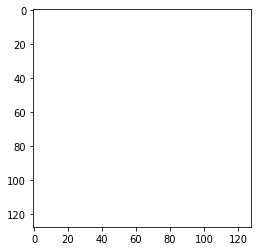

In [3]:
# Create a "blank image"
image = tf.constant(np.ones((1, 128, 128, 3)), tf.float64)
print(f"type: {type(image)}")
print(f"`image` is a {tf.rank(image)}-d Tensor, with shape: {image.shape}")
print(f"Each dimension represents the:")
print(f"Batch size: {image.shape[0]}")
print(f"X dimension: {image.shape[1]}")
print(f"Y dimension: {image.shape[2]}")
print(f"RGB channel: {image.shape[3]}")

plt.imshow(image[0, :, :, :], cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


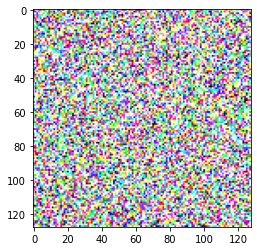

In [4]:
# Tensor operations: Adding random `noise` to `image`
noise = tf.random.normal((1, 128, 128, 3), dtype=tf.float64)
noisy_image = tf.add(image, noise)

plt.imshow(noisy_image[0, :, :, :], cmap='gray')
plt.show()

## Basic Perceptron

A perceptron is basically a function as defined below

$$
f(x) = \sigma(Wx + b) 
$$

Where,
- $x$ is the input
- $W$ and $b$ is the learnt weight (matrix) and bias (vector)
- $\sigma$ is the sigmoid function is defined as

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

![](https://qph.fs.quoracdn.net/main-qimg-6b67bea3311c3429bfb34b6b1737fe0c)

In [25]:
def perceptron(X):
    W = tf.Variable(tf.random.normal((128, 128), dtype=tf.float64))
    b = tf.Variable(tf.zeros((128, 3), dtype=tf.float64))
    
    logits = tf.matmul(W, X) + b
    Y = 1 / (1 + tf.exp(logits))
    return Y

In [ ]:
# Set ground truths to be 1s and 0s
Y = (np.arange(128) % 2 == 0).astype(float)

In [44]:
output = perceptron(noisy_image[0])
score = tf.reduce_mean(tf.reshape(output, (128, -1)), 1)

<tf.Tensor: shape=(128,), dtype=float64, numpy=
array([0.45843062, 0.46574853, 0.47184219, 0.48167396, 0.46795245,
       0.48639062, 0.4607597 , 0.45861697, 0.4632258 , 0.45327044,
       0.46928592, 0.47084691, 0.46237189, 0.45129195, 0.45218041,
       0.47170079, 0.4662455 , 0.47884824, 0.44286559, 0.44588206,
       0.4303815 , 0.44143491, 0.45323732, 0.48451304, 0.47245528,
       0.47319053, 0.46018007, 0.48243308, 0.43847316, 0.42022284,
       0.4812707 , 0.46300351, 0.45023406, 0.49246656, 0.47479929,
       0.45938019, 0.48317428, 0.49590039, 0.46242989, 0.4798753 ,
       0.49334729, 0.45782547, 0.46261273, 0.50520708, 0.46789005,
       0.4859942 , 0.43777149, 0.49702025, 0.48407471, 0.46728336,
       0.4724475 , 0.43087096, 0.42346949, 0.47232326, 0.4678715 ,
       0.45792861, 0.47210381, 0.46792827, 0.52288577, 0.46077131,
       0.46400584, 0.42260402, 0.45110748, 0.45867913, 0.43330511,
       0.46036805, 0.44334904, 0.47899927, 0.44956986, 0.45346394,
       0.44297

In [67]:
criterion = tf.losses.BinaryCrossentropy()
loss = criterion(Y, score)
print(loss)

tf.Tensor(0.6993495225906372, shape=(), dtype=float64)


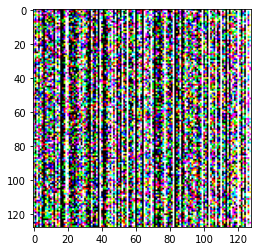

In [64]:
plt.imshow(output[:, :, :], cmap='gray')
plt.show()